In [89]:
!pip install tensorflow

In [90]:
!pip install keras

In [91]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [92]:
forest = pd.read_csv('/content/forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [93]:
forest['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
forest.shape

(517, 31)

In [96]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [97]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='size_category', ylabel='FFMC'>

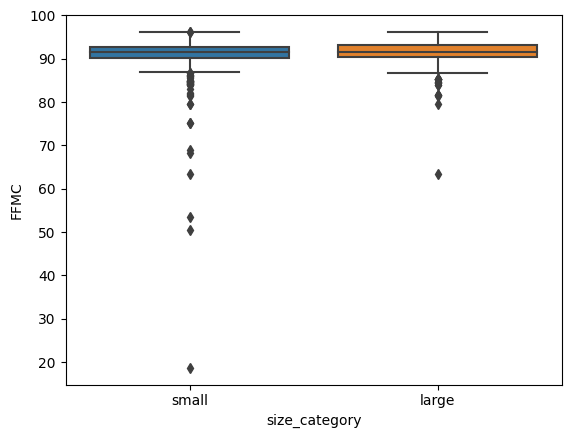

In [98]:
sns.boxplot( x = 'size_category', y = 'FFMC',data = forest)

<Axes: xlabel='size_category', ylabel='DMC'>

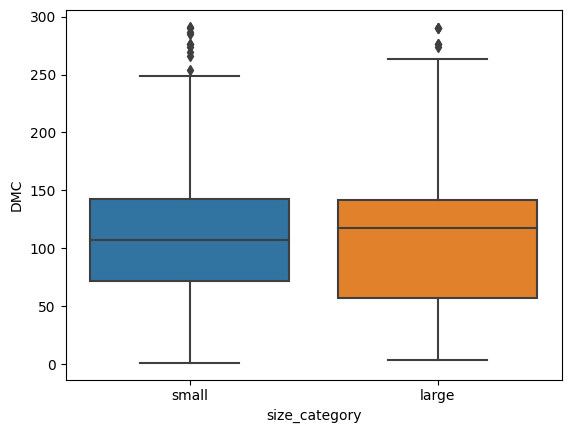

In [99]:
sns.boxplot( x = 'size_category', y = 'DMC',data = forest)

<Axes: xlabel='size_category', ylabel='DC'>

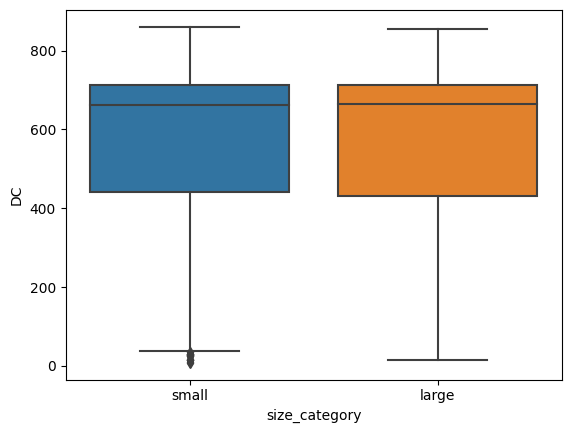

In [100]:
sns.boxplot( x = 'size_category', y = 'DC',data = forest)

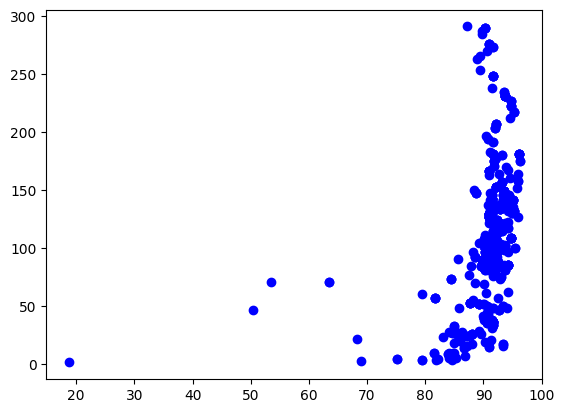

In [101]:
plt.scatter(x = forest['FFMC'], y=forest["DMC"],color='blue')

In [102]:

forest.loc[forest["size_category"]=='small','size_category']=0
forest.loc[forest["size_category"]=='large','size_category']=1
forest["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [103]:
forest.size_category.value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [104]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [105]:
#def norm(i):
#  x = ( i-i.min())/(i.max()-i.min() )
 # return(x)

In [106]:
# label encoding
from sklearn import preprocessing
label1 = preprocessing.LabelEncoder()
forest.month=label1.fit_transform(forest.month)
forest.day = label1.fit_transform(forest.day)
forest.size_category= label1.fit_transform(forest.size_category)
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0


In [107]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [108]:
forest1 = forest.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,30]]

In [109]:
forest1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0


In [110]:
x = forest.iloc[:,0:11]
y = forest.iloc[:,12]

In [111]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [112]:
from scipy.stats import norm
X = norm(x)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y)

Back - Propotion


In [115]:
# fix random seed
seed =15
np.random.seed(seed)

In [116]:
model = Sequential()
model.add(Dense(29, input_dim=11, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [117]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
history = model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 12ms/step - loss: 4.3296 - accuracy: 0.8324 - val_loss: 0.6328 - val_accuracy: 0.8070
Epoch 2/250
35/35 [==============================] - 0s 7ms/step - loss: 0.5464 - accuracy: 0.8035 - val_loss: 0.5770 - val_accuracy: 0.9006
Epoch 3/250
35/35 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.7832 - val_loss: 1.0184 - val_accuracy: 0.4737
Epoch 4/250
35/35 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.8208 - val_loss: 0.4631 - val_accuracy: 0.9006
Epoch 5/250
35/35 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.8064 - val_loss: 0.4715 - val_accuracy: 0.9006
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.8121 - val_loss: 0.5364 - val_accuracy: 0.9006
Epoch 7/250
35/35 [==============================] - 0s 5ms/step - loss: 0.4902 - accuracy: 0.8035 - val_loss: 0.5301 - val_accuracy: 0.9006
Epoch 8/250


In [119]:
scores = model.evaluate(x, y)
print('%s: %2f%%' % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.9014
accuracy: 90.135396%


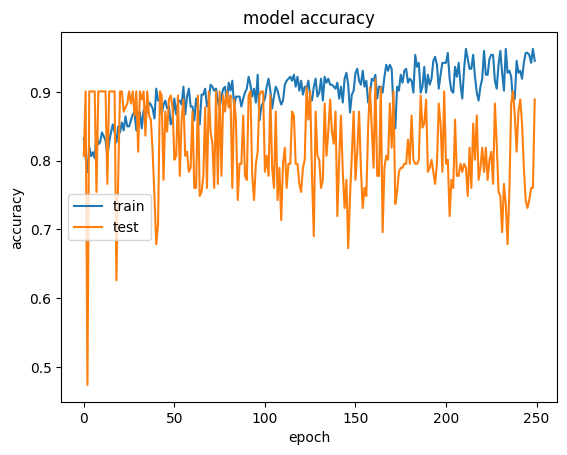

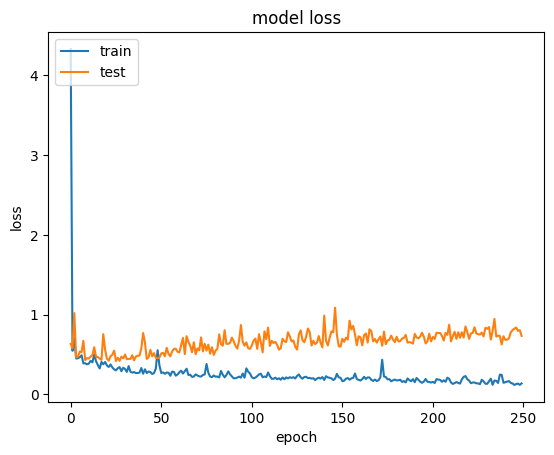

In [120]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='center left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Hyperparameter-Tuning

In [121]:
import keras
from sklearn.preprocessing import StandardScaler

In [122]:
#standardization
a = StandardScaler( )
a.fit(x)
x_standardized = a.transform(x)

In [123]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,0.055339,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


Tuning parameter :-
1. Batch size -   at time how many data point to send to the network

2. Epochs  - how many times we are sending data to the netwrok

In [124]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

In [137]:
def create_model():
    model = Sequential()

    model.add(Dense(15, input_dim=11, kernel_initializer='uniform', activation='relu'))


    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))


    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [141]:
model = KerasClassifier(build_fn = create_model,verbose = 0)


batch_size = [10,20,40]


epochs = [10,50,100,150]


param_grid = dict(batch_size = batch_size,epochs = epochs)

grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 50) # by default it takes 5 K folds, verbose =10: displays 10 lines of epochs 1/12 for 10 times
grid_result = grid.fit(x_standardized,y)
# batch size=3, epoch=4. 3*4=12, 12*5 folds = 60 models will be built

<ipython-input-141-5411d6ea9e62>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=0.875 total time=   5.3s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.913 total time=   3.4s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.874 total time=   3.1s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.854 total time=   2.3s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.854 total time=   2.6s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=50;

In [142]:
#print('Best : { }, using { }'.format(grid_result.best_score_, grid_result.best_params_))
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds =  grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  #print('{ },{ } with: { }'.format(mean, stdev, param))
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9845033645629883, using {'batch_size': 10, 'epochs': 150}
0.8741971611976623,0.021581587797991235 with: {'batch_size': 10, 'epochs': 10}
0.9534167289733887,0.06654179741383098 with: {'batch_size': 10, 'epochs': 50}
0.9806012034416198,0.02037415217910984 with: {'batch_size': 10, 'epochs': 100}
0.9845033645629883,0.016940672194216952 with: {'batch_size': 10, 'epochs': 150}
0.839432418346405,0.028668778106285164 with: {'batch_size': 20, 'epochs': 10}
0.9534167408943176,0.04229114603733309 with: {'batch_size': 20, 'epochs': 50}
0.9553584814071655,0.06281025346779338 with: {'batch_size': 20, 'epochs': 100}
0.9456497430801392,0.06281315041197069 with: {'batch_size': 20, 'epochs': 150}
0.8569081425666809,0.02301194427451941 with: {'batch_size': 40, 'epochs': 10}
0.9243091940879822,0.07304969125637728 with: {'batch_size': 40, 'epochs': 50}
0.9845033645629883,0.016940672194216952 with: {'batch_size': 40, 'epochs': 100}
0.9844846844673156,0.021801094179360613 with: {'batch_size': 40, 'e

Tuning Of Hyperparameters :- Learning Rate And Drop Out Rate

In [143]:
from keras.layers import Dropout

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

# Define the grid search parameters: Learning rate and dropout rate are the hyperparameters we want to test

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]# drop 0%,10%, 20% neurons

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

<ipython-input-143-ac67cdc8a6d6>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.846 total time=   3.4s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.846 total time=   4.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.883 total time=   2.8s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.825 total time=   4.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.883 total time=   3.6s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [144]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds =  grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  #print('{ },{ } with: { }'.format(mean, stdev, param))
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9595593690872193, using {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8569081425666809,0.02301194427451941 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9437080025672913,0.05226374870247363 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9595593690872193,0.05715336228494478 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8569081425666809,0.02301194427451941 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9089059114456177,0.06225435126423259 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8974234461784363,0.06230064839278194 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.8569081425666809,0.02301194427451941 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8682972431182862,0.04181818653497228 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8780433177947998,0.04454484043521643 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Tuning of Hyperparameters :- Activation Function and Kernal Initializer

In [172]:
def  create_model(activation_function, init):
    model = Sequential()

    model.add(Dense(11, input_dim=11, kernel_initializer=init, activation= activation_function))
    model.add(Dropout(0.0))

    model.add(Dense(15, input_dim=11, kernel_initializer=init, activation= activation_function))
    model.add(Dropout(0.0))

    model.add(Dense(1,  activation='sigmoid'))

    adam=Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

# Define the grid search parameters

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters

param_grids = dict(activation_function = activation_function, init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

<ipython-input-172-146e98cf2bfc>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.846 total time=   4.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.846 total time=   4.4s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.883 total time=   4.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.825 total time=   2.7s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.883 total time=   4.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [173]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8569081425666809, using {'activation_function': 'softmax', 'init': 'uniform'}
0.8569081425666809,0.02301194427451941 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8569081425666809,0.02301194427451941 with: {'activation_function': 'softmax', 'init': 'normal'}
0.8569081425666809,0.02301194427451941 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8452576518058776,0.021283371530897502 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8413741588592529,0.014707747924600556 with: {'activation_function': 'relu', 'init': 'normal'}
0.8569081425666809,0.02301194427451941 with: {'activation_function': 'relu', 'init': 'zero'}
0.8064973831176758,0.04457193624142698 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8026512265205383,0.044302062677666704 with: {'activation_function': 'tanh', 'init': 'normal'}
0.8569081425666809,0.02301194427451941 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8006908059120178,0.05185702235086007 with: {'ac

Tunning of Hyperparameter :- Number of Neurons in hidden layers

In [175]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

# Define the grid search parameters

neuron1 = [4,8,16]# in first hidden layer use 4,8,16 neurons
neuron2 = [2,4,8]# in second hidden layer use 2,4,8 neurons

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

<ipython-input-175-e548cb4d03e2>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.846 total time=   5.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.846 total time=   2.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.883 total time=   4.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.825 total time=   4.8s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.883 total time=   2.7s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [176]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8569081425666809, using {'neuron1': 4, 'neuron2': 2}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 4, 'neuron2': 2}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 4, 'neuron2': 4}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 4, 'neuron2': 8}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 8, 'neuron2': 2}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 8, 'neuron2': 4}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 8, 'neuron2': 8}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 16, 'neuron2': 2}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 16, 'neuron2': 4}
0.8569081425666809,0.02301194427451941 with: {'neuron1': 16, 'neuron2': 8}


Training Model Wirh Optimum Values Of Hyperparameters

In [177]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 11,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

# Fitting the model

model.fit(x_standardized,y)

# Predicting using trained model

y_predict = model.predict(x_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

<ipython-input-177-5f4f4c6633dc>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)


17/17 [==============================] - 0s 2ms/step
0.8588007736943907


Hyperparameter all at once

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

<ipython-input-178-4d237c172ea9>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.846 total time=   2.7s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=0.846 total time=   2.7s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, lear